In [ ]:
!pip install  dgl -f https://data.dgl.ai/wheels/cu118/repo.html

Looking in links: https://data.dgl.ai/wheels/cu118/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.2/748.2 MB 2.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install dgl

In [ ]:
!apt-get update
!apt-get install -y nvidia-cuda-toolkit

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,118 kB]
Fetched 2,351 kB in 3s (696 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information

In [ ]:
import dgl.nn as dglnn
from dgl import from_networkx
import torch.nn as nn
import torch as th
import torch.nn.functional as F
import dgl.function as fn
import networkx as nx
import pandas as pd
import socket
import struct
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
data = pd.read_csv('/content/CIC-IOT-2023-CICFLOW_METER_NEW_Dataset_GNN.csv')


In [ ]:
data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.137.41,50093,157.249.81.141,443,6,0,0,251,1,3,16,126077,0,Benign
1,192.168.137.41,51746,157.249.81.141,80,6,0,0,196,2,4,2,274175,0,Benign
2,157.249.81.141,80,192.168.137.41,51746,6,0,0,375,1,2,16,2,0,Benign
3,192.168.137.41,50096,157.249.81.141,443,6,0,0,251,2,4,2,273612,0,Benign
4,157.249.81.141,443,192.168.137.41,50096,6,0,0,7,1,2,16,2,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850510,192.168.137.186,80,192.168.137.66,34488,6,80,17,0,4,2,18,82129,1,DoS
850511,192.168.137.174,80,192.168.137.66,40966,6,80,0,0,1,1,4,0,1,DoS
850512,192.168.137.66,50134,192.168.137.254,34287,6,80,0,13523,3,11,2,4228698,1,DoS
850513,192.168.137.66,41204,192.168.137.186,80,6,80,0,17,1,5,2,6466336,1,DoS


In [ ]:
data['IPV4_SRC_ADDR'] = data.IPV4_SRC_ADDR.apply(lambda x: socket.inet_ntoa(struct.pack('>I', random.randint(0xac100001, 0xac1f0001))))

In [ ]:
data['IPV4_SRC_ADDR'] = data.IPV4_SRC_ADDR.apply(str)
data['L4_SRC_PORT'] = data.L4_SRC_PORT.apply(str)
data['IPV4_DST_ADDR'] = data.IPV4_DST_ADDR.apply(str)
data['L4_DST_PORT'] = data.L4_DST_PORT.apply(str)

In [ ]:
data['IPV4_SRC_ADDR'] = data['IPV4_SRC_ADDR'] + ':' + data['L4_SRC_PORT']
data['IPV4_DST_ADDR'] = data['IPV4_DST_ADDR'] + ':' + data['L4_DST_PORT']

In [ ]:
data.drop(columns=['L4_SRC_PORT','L4_DST_PORT'],inplace=True)

In [ ]:
data

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.30.32.31:50093,157.249.81.141:443,6,0,0,251,1,3,16,126077,0,Benign
1,172.27.125.45:51746,157.249.81.141:80,6,0,0,196,2,4,2,274175,0,Benign
2,172.19.222.175:80,192.168.137.41:51746,6,0,0,375,1,2,16,2,0,Benign
3,172.29.38.40:50096,157.249.81.141:443,6,0,0,251,2,4,2,273612,0,Benign
4,172.23.23.114:443,192.168.137.41:50096,6,0,0,7,1,2,16,2,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...
850510,172.28.218.43:80,192.168.137.66:34488,6,80,17,0,4,2,18,82129,1,DoS
850511,172.22.167.89:80,192.168.137.66:40966,6,80,0,0,1,1,4,0,1,DoS
850512,172.27.175.250:50134,192.168.137.254:34287,6,80,0,13523,3,11,2,4228698,1,DoS
850513,172.27.181.249:41204,192.168.137.186:80,6,80,0,17,1,5,2,6466336,1,DoS


In [ ]:
data.drop(columns=['Attack'],inplace = True)

In [ ]:
data.rename(columns={"Label": "label"},inplace = True)

In [ ]:
label = data.label

In [ ]:
data.drop(columns=['label'],inplace = True)

In [ ]:
scaler = StandardScaler()

In [ ]:
data =  pd.concat([data, label], axis=1)

In [ ]:
data

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
0,172.30.32.31:50093,157.249.81.141:443,6,0,0,251,1,3,16,126077,0
1,172.27.125.45:51746,157.249.81.141:80,6,0,0,196,2,4,2,274175,0
2,172.19.222.175:80,192.168.137.41:51746,6,0,0,375,1,2,16,2,0
3,172.29.38.40:50096,157.249.81.141:443,6,0,0,251,2,4,2,273612,0
4,172.23.23.114:443,192.168.137.41:50096,6,0,0,7,1,2,16,2,0
...,...,...,...,...,...,...,...,...,...,...,...
850510,172.28.218.43:80,192.168.137.66:34488,6,80,17,0,4,2,18,82129,1
850511,172.22.167.89:80,192.168.137.66:40966,6,80,0,0,1,1,4,0,1
850512,172.27.175.250:50134,192.168.137.254:34287,6,80,0,13523,3,11,2,4228698,1
850513,172.27.181.249:41204,192.168.137.186:80,6,80,0,17,1,5,2,6466336,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     data, label, test_size=0.3, random_state=123,stratify= label)

In [ ]:
encoder = ce.TargetEncoder(cols=['TCP_FLAGS','L7_PROTO','PROTOCOL'])
encoder.fit(X_train, y_train)
X_train = encoder.transform(X_train)

In [ ]:
cols_to_norm = list(set(list(X_train.iloc[:, 2:].columns ))  - set(list(['label'])) )
X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])

In [ ]:
X_train

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
499868,172.17.88.154:37670,192.168.137.211:8080,0.648635,1.012600,-0.013913,-0.049557,0.138476,0.093322,0.851218,2.180673,1
638367,172.24.7.235:34590,192.168.137.131:80,0.648635,1.012600,0.126131,0.396249,0.162864,0.432872,0.851218,0.624566,1
183751,172.25.36.142:22447,3.221.182.58:32100,-1.543673,-0.987557,-0.013669,-0.049557,-0.068821,-0.105724,-1.268581,-0.646549,0
347649,172.20.32.39:43450,192.168.137.58:55443,0.648635,-0.987557,0.000904,-0.026039,0.028731,0.023070,-0.930008,2.194276,0
2218,172.25.125.209:51313,157.249.81.141:443,0.648635,-0.987557,-0.013913,-0.047518,-0.068821,-0.058890,0.851218,-0.644572,0
...,...,...,...,...,...,...,...,...,...,...,...
327787,172.24.248.238:45779,157.249.81.141:80,0.648635,-0.987557,-0.013913,-0.047965,-0.068821,-0.058890,0.851218,-0.644621,0
596051,172.22.109.145:38970,192.168.137.64:80,0.648635,1.012600,-0.013913,0.072878,-0.007851,0.105031,0.851218,1.638560,1
83461,172.24.166.112:53232,192.168.137.1:53,-1.543673,-0.987557,-0.013180,-0.049557,-0.068821,-0.105724,-1.268581,-0.650013,0
762096,172.25.180.53:40468,192.168.137.141:80,0.648635,1.012600,0.035497,0.112401,0.040925,0.128448,0.851218,-0.279734,1


In [ ]:
X_train['h'] = X_train[ cols_to_norm ].values.tolist()

In [ ]:
G = nx.from_pandas_edgelist(X_train, "IPV4_SRC_ADDR", "IPV4_DST_ADDR", ['h','label'],create_using=nx.MultiGraph())

In [ ]:
G = G.to_directed()

In [ ]:
G = from_networkx(G,edge_attrs=['h','label'] )

In [ ]:
# Eq1
G.ndata['h'] = th.ones(G.num_nodes(), G.edata['h'].shape[1])

In [ ]:
G.edata['train_mask'] = th.ones(len(G.edata['h']), dtype=th.bool)

In [ ]:
G.edata['train_mask']

tensor([True, True, True,  ..., True, True, True])

In [ ]:
def compute_accuracy(pred, labels):
    return (pred.argmax(1) == labels).float().mean().item()

In [ ]:
class SAGELayer(nn.Module):
    def __init__(self, ndim_in, edims, ndim_out, activation):
        super(SAGELayer, self).__init__()
        ### force to outut fix dimensions
        self.W_msg = nn.Linear(ndim_in + edims, ndim_out)
        ### apply weight
        self.W_apply = nn.Linear(ndim_in + ndim_out, ndim_out)
        self.activation = activation

    def message_func(self, edges):
        return {'m': self.W_msg(th.cat([edges.src['h'], edges.data['h']], 2))}

    def forward(self, g_dgl, nfeats, efeats):
        with g_dgl.local_scope():
            g = g_dgl
            g.ndata['h'] = nfeats
            g.edata['h'] = efeats
            # Eq4
            g.update_all(self.message_func, fn.mean('m', 'h_neigh'))
            # Eq5
            g.ndata['h'] = F.relu(self.W_apply(th.cat([g.ndata['h'], g.ndata['h_neigh']], 2)))
            return g.ndata['h']


class SAGE(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout):
        super(SAGE, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(SAGELayer(ndim_in, edim, 128, activation))
        self.layers.append(SAGELayer(128, edim, ndim_out, activation))
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, g, nfeats, efeats):
        for i, layer in enumerate(self.layers):
            if i != 0:
                nfeats = self.dropout(nfeats)
            nfeats = layer(g, nfeats, efeats)
        return nfeats.sum(1)

In [ ]:
class MLPPredictor(nn.Module):
    def __init__(self, in_features, out_classes):
        super().__init__()
        self.W = nn.Linear(in_features * 2, out_classes)

    def apply_edges(self, edges):
        h_u = edges.src['h']
        h_v = edges.dst['h']
        score = self.W(th.cat([h_u, h_v], 1))
        return {'score': score}

    def forward(self, graph, h):
        with graph.local_scope():
            graph.ndata['h'] = h
            graph.apply_edges(self.apply_edges)
            return graph.edata['score']

In [ ]:
G.ndata['h'] = th.reshape(G.ndata['h'], (G.ndata['h'].shape[0], 1,G.ndata['h'].shape[1]))
G.edata['h'] = th.reshape(G.edata['h'], (G.edata['h'].shape[0], 1,G.edata['h'].shape[1]))

class Model(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout):
        super().__init__()
        self.gnn = SAGE(ndim_in, ndim_out, edim, activation, dropout)
        self.pred = MLPPredictor(ndim_out, 2)
    def forward(self, g, nfeats, efeats):
        h = self.gnn(g, nfeats, efeats)
        return self.pred(g, h)

In [ ]:
class Model(nn.Module):
    def __init__(self, ndim_in, ndim_out, edim, activation, dropout):
        super().__init__()
        self.gnn = SAGE(ndim_in, ndim_out, edim, activation, dropout)
        self.pred = MLPPredictor(ndim_out, 2)
    def forward(self, g, nfeats, efeats):
        h = self.gnn(g, nfeats, efeats)
        return self.pred(g, h)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                  classes = np.unique(G.edata['label'].cpu().numpy()),
                                                  y = G.edata['label'].cpu().numpy())

In [ ]:
class_weights

array([0.98763466, 1.0126789 ])

In [ ]:
class_weights = th.FloatTensor(class_weights).cuda()
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
# pip list|grep dgl

In [ ]:
# !apt-get update
# !apt-get install -y nvidia-cuda-toolkit
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
print("data" in globals())

True


In [ ]:
import dgl
# G = dgl.DGLGraph()
G = G.to('cuda:0')
print(G.device)

cuda:0


In [ ]:
# Print the keys of the node data dictionary
print(G.ndata.keys())

dict_keys(['h'])


In [ ]:
# Check if the key 'h' exists in the node data dictionary
if 'h' not in G.ndata.keys():
    print("The key 'h' does not exist in the node data dictionary.")

In [ ]:
G.ndata['h'].device

device(type='cuda', index=0)

In [ ]:
G.edata['h'].device

device(type='cuda', index=0)

In [ ]:
node_features = G.ndata['h']
edge_features = G.edata['h']

edge_label = G.edata['label']
train_mask = G.edata['train_mask']

model = Model(G.ndata['h'].shape[2], 128, G.ndata['h'].shape[2], F.relu, 0.2).cuda()
opt = th.optim.Adam(model.parameters())

for epoch in range(1,50):
    pred = model(G, node_features,edge_features).cuda()
    loss = criterion(pred[train_mask] ,edge_label[train_mask])
    opt.zero_grad()
    loss.backward()
    opt.step()
    if epoch % 100 == 0:
      print('Training acc:', compute_accuracy(pred[train_mask], edge_label[train_mask]))

In [ ]:
X_test = encoder.transform(X_test)

In [ ]:
X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

In [ ]:
X_test

,IPV4_SRC_ADDR,IPV4_DST_ADDR,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,label
51918,172.21.81.112:46889,157.249.81.141:443,0.648635,-0.987557,-0.013913,-0.047518,-0.068821,-0.058890,0.851218,-0.644611,0
239218,172.23.124.97:35732,157.249.81.141:80,0.648635,-0.987557,-0.013913,-0.047965,-0.081015,-0.058890,0.851218,-0.644635,0
350176,172.28.247.125:53096,192.168.137.1:53,-1.543673,-0.987557,-0.013180,-0.049557,-0.068821,-0.105724,-1.268581,-0.650735,0
274814,172.26.20.56:53696,173.194.194.206:443,0.648635,-0.987557,-0.013913,-0.049557,-0.032239,-0.070599,-0.336072,1.491070,0
822676,172.18.215.231:35844,192.168.137.186:80,0.648635,1.012600,-0.013913,-0.049418,-0.081015,-0.047181,0.851218,-0.335736,1
...,...,...,...,...,...,...,...,...,...,...,...
249539,172.24.215.50:46513,192.168.137.1:53,-1.543673,-0.987557,-0.013180,-0.049557,-0.068821,-0.105724,-1.268581,-0.648808,0
137544,172.16.92.33:15151,47.112.162.49:32100,-1.543673,-0.987557,-0.013669,-0.049557,-0.068821,-0.105724,-1.268581,-0.642329,0
405466,172.27.230.161:45936,192.168.137.1:53,-1.543673,-0.987557,-0.013180,-0.049557,-0.068821,-0.105724,-1.268581,-0.648865,0
812393,172.20.19.243:58076,192.168.137.254:8009,0.648635,1.012600,-0.013913,-0.049557,-0.044433,-0.082307,0.851218,-0.035736,1


In [ ]:
X_test['h'] = X_test[ cols_to_norm ].values.tolist()

In [ ]:
G_test = nx.from_pandas_edgelist(X_test, "IPV4_SRC_ADDR", "IPV4_DST_ADDR", ['h','label'],create_using=nx.MultiGraph())
G_test = G_test.to_directed()
G_test = from_networkx(G_test,edge_attrs=['h','label'] )
actual = G_test.edata.pop('label')
G_test.ndata['feature'] = th.ones(G_test.num_nodes(), G.ndata['h'].shape[2])

In [ ]:
G_test.ndata['feature'] = th.reshape(G_test.ndata['feature'], (G_test.ndata['feature'].shape[0], 1, G_test.ndata['feature'].shape[1]))

In [ ]:
G_test.edata['h'] = th.reshape(G_test.edata['h'], (G_test.edata['h'].shape[0], 1, G_test.edata['h'].shape[1]))

In [ ]:
G_test = G_test.to('cuda:0')

In [ ]:
import timeit
start_time = timeit.default_timer()
node_features_test = G_test.ndata['feature']
edge_features_test = G_test.edata['h']
test_pred = model(G_test, node_features_test, edge_features_test).cuda()
elapsed = timeit.default_timer() - start_time

In [ ]:
print(str(elapsed) + ' seconds')

0.010375488999670779 seconds


In [ ]:
test_pred = test_pred.argmax(1)

In [ ]:
test_pred = th.Tensor.cpu(test_pred).detach().numpy()

In [ ]:
actual = ["Normal" if i == 0 else "Attack" for i in actual]
test_pred = ["Normal" if i == 0 else "Attack" for i in test_pred]

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

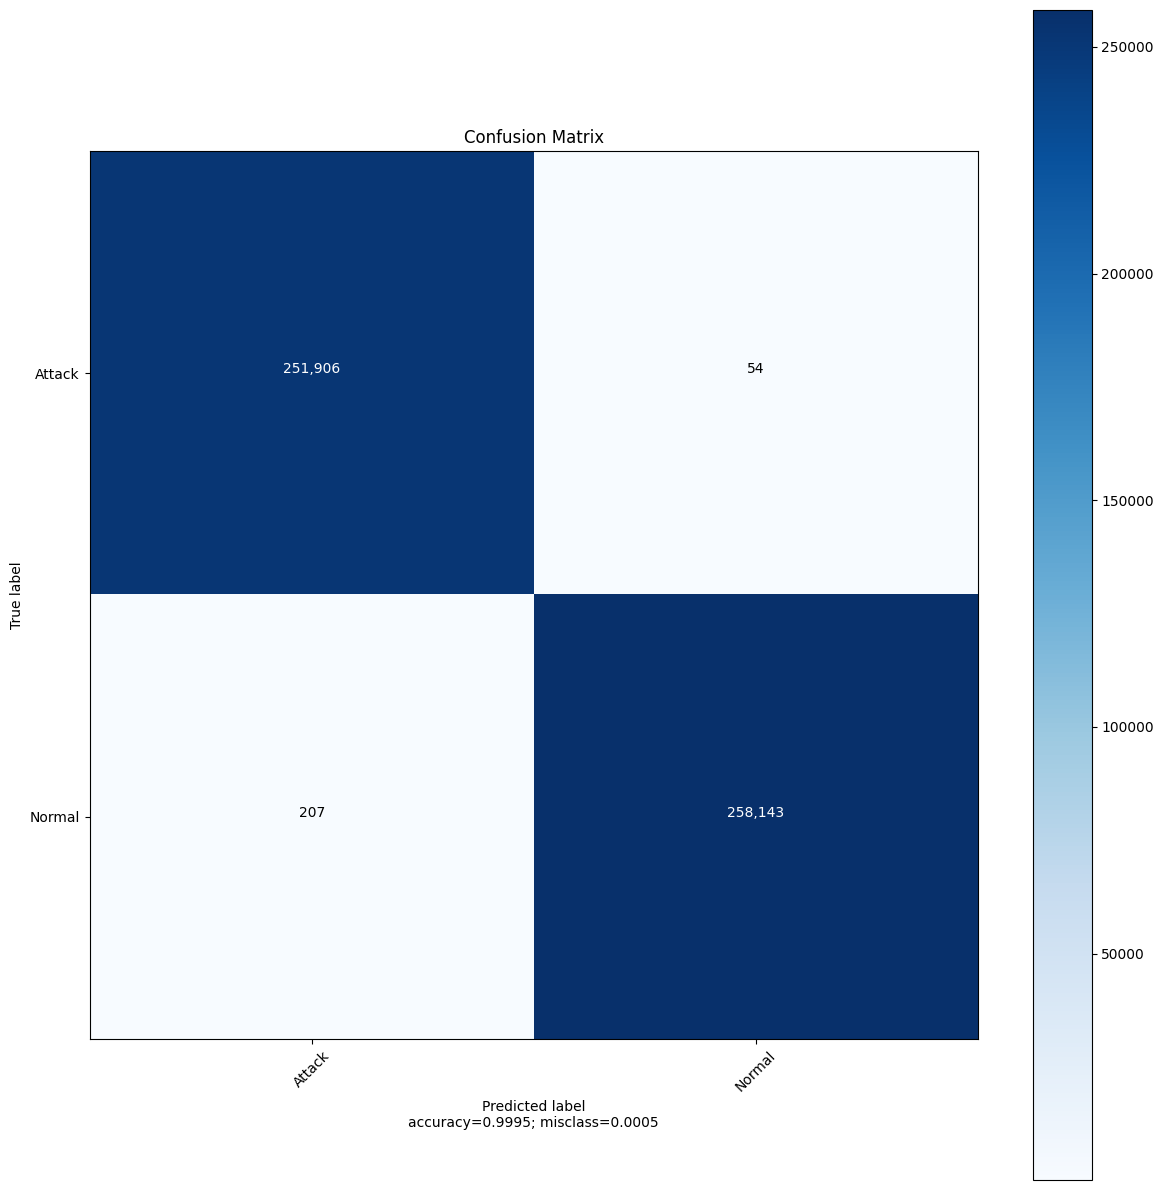

In [ ]:
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(cm = confusion_matrix(actual, test_pred),
                      normalize    = False,
                      target_names = np.unique(actual),
                      title        = "Confusion Matrix")